In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import warnings
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import copy

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Train images shape: (60000, 28, 28)
Train labels: [5 0 4 ... 5 6 8]


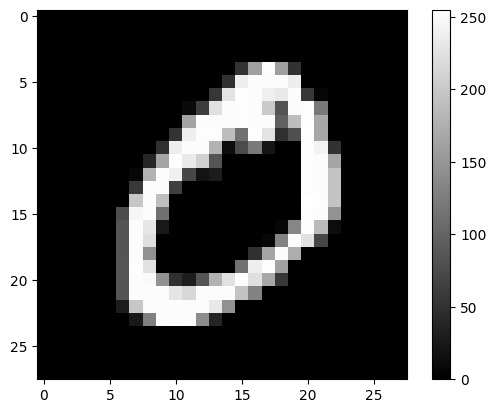

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Explore the dataset
print("Train images shape:", train_images.shape)
print("Train labels:", train_labels)

# Display an example image
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.colorbar()
plt.show()

In [45]:
rf = RandomForestRegressor(n_estimators=200, max_depth=6, random_state=0, max_samples=0.2, n_jobs=-1)
sigma = 0.7
repeat = 3

y = train_images.reshape(-1, 28*28).copy()
X = train_labels.reshape(-1, 1).copy()
X = X.astype(float)

X = np.repeat(X, repeat, axis=1)
y = np.repeat(y, repeat, axis=1)

N = len(X)
X2 = np.zeros((N, 2))

r = np.random.normal(0, 0.3, 1)[0]
for i in range(N):
    if i % repeat == 0:
        r = np.random.normal(0, sigma, 1)[0]
    X2[i] = [X[i, 0] + r , X[i, 0] + r] 
rf.fit(X2, y)

y_pred = rf.predict([[5, 5]])
y_pred = y_pred.reshape(28, 28)

plt.imshow(y_pred, cmap='gray')



[ 0.26603618 -0.54780587 -0.5412379  -0.00813944  0.57420524 -0.31108287
 -0.2721325  -0.0828161  -0.0119177  -0.21383627]
-0.6412957461412958


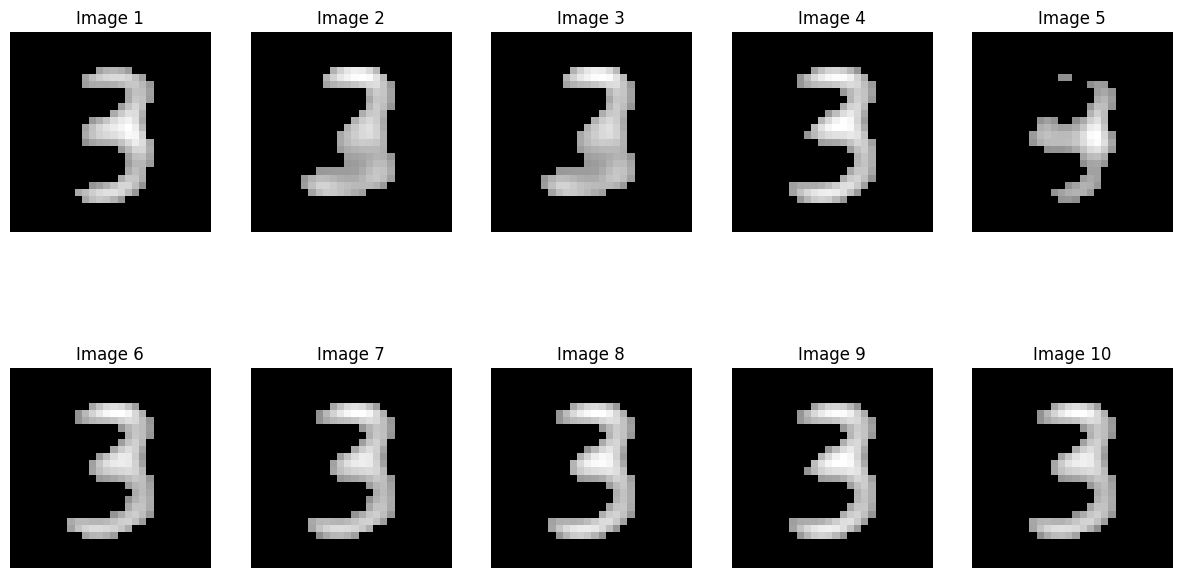

In [12]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
threshold = 100

# Flatten the axs array for easier indexing
axs = axs.flatten()

num_samples = 10
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
input = np.array([[3 + noise[i]] for i in range(num_samples)])

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)

y_pred = np.where(y_pred < threshold, 0, y_pred)

# Plot data on the subplots
for i in range(num_samples):
    #y_pred = rf.predict([[0 + random.uniform(-sigma, sigma)]])
    #y_pred[i] = y_pred[i].reshape(28, 28)
    axs[i].imshow(y_pred[i], cmap='gray')
    axs[i].set_title(f'Image {i+1}')
    axs[i].axis('off')  # Turn off axis labels and ticks

print(noise)
print(sum(y_pred[1].flatten()- y_pred[2].flatten()))


In [ ]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(10, 20, figsize=(15, 15))
threshold = 90

# Flatten the axs array for easier indexing
axs = axs.flatten()

num_samples = 200
# noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
# input = np.array([[3.5 + noise[i]] for i in range(num_samples)])
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])

input = np.array([0 + i*(10/num_samples) for i in range(num_samples)]).reshape(-1, 1)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)

y_pred = np.where(y_pred < threshold, 0, y_pred)

# Plot data on the subplots
for i in range(num_samples):
    #y_pred = rf.predict([[0 + random.uniform(-sigma, sigma)]])
    #y_pred[i] = y_pred[i].reshape(28, 28)
    axs[i].imshow(y_pred[i], cmap='gray')
    #axs[i].set_title(f'img {i+1}')
    axs[i].axis('off')  # Turn off axis labels and ticks

#print(sum(y_pred[1].flatten()- y_pred[2].flatten()))

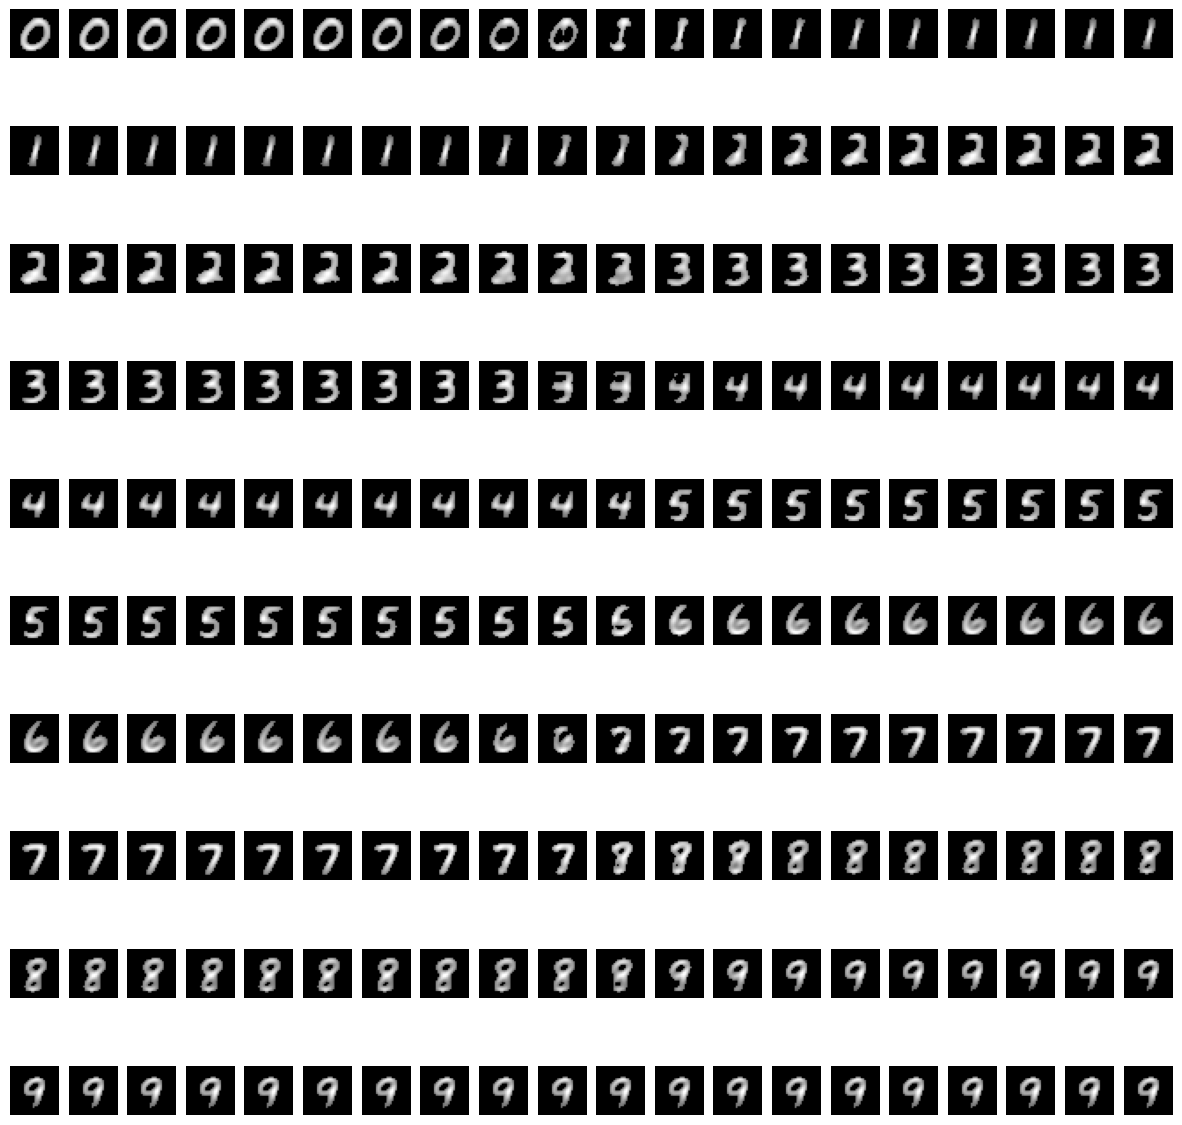

In [43]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(10, 20, figsize=(15, 15))
threshold = 90

# Flatten the axs array for easier indexing
axs = axs.flatten()

num_samples = 200
# noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
# input = np.array([[3.5 + noise[i]] for i in range(num_samples)])
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])

input = np.array([[0 + i*(10/num_samples), 0 + i*(10/num_samples)] for i in range(num_samples)]) #.reshape(-1, 1)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)

y_pred = np.where(y_pred < threshold, 0, y_pred)

# Plot data on the subplots
for i in range(num_samples):
    #y_pred = rf.predict([[0 + random.uniform(-sigma, sigma)]])
    #y_pred[i] = y_pred[i].reshape(28, 28)
    axs[i].imshow(y_pred[i], cmap='gray')
    #axs[i].set_title(f'img {i+1}')
    axs[i].axis('off')  # Turn off axis labels and ticks

#print(sum(y_pred[1].flatten()- y_pred[2].flatten()))

In [44]:
# Assuming 'old_array' is your original NumPy array
old_array = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

# Repeat each row three times consecutively
new_array = np.repeat(old_array, 3, axis=0)

print(new_array)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [4 5 6]
 [4 5 6]
 [4 5 6]
 [7 8 9]
 [7 8 9]
 [7 8 9]]
